<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/AP22110010779_FS_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import pandas as pd;
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/melbourne_housing_raw (1).csv')
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for column in data.keys():
  print(data[column].dtype)
  if data[column].dtype == 'object':
    data[column] = label_encoder.fit_transform(data[column])

object
int64
object
float64
object
object
object
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
float64
object
float64


In [2]:

x=data.drop('Propertycount',axis=1)
y=data['Propertycount']
print(x.shape)
print(y.shape)
if y.isnull().any():
    y = y.dropna()
    x = x.loc[y.index]
print(x.shape)
print(y.shape)

(34857, 19)
(34857,)
(34854, 19)
(34854,)


In [3]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=10, random_state=42)
def evaluate_model(X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

mae_list = []
num_features_list = []

current_features = list(X_train.columns)
initial_mae = evaluate_model(X_train[current_features], X_test[current_features], y_train, y_test)
mae_list.append(initial_mae)
num_features_list.append(len(current_features))

print(f"initial mae with all features: {initial_mae}")

initial mae with all features: 16.97251601797839


In [4]:
for _ in range(len(current_features) - 1):
    importances = model.feature_importances_
    least_important_idx = np.argmin(importances)
    least_important_feature = current_features[least_important_idx]
    current_features.pop(least_important_idx)
    new_mae = evaluate_model(X_train[current_features], X_test[current_features], y_train, y_test)


    mae_list.append(new_mae)
    num_features_list.append(len(current_features))
    print(f"removed {least_important_feature}, mae: {new_mae}, features left: {len(current_features)}")


removed Type, mae: 18.184651429664342, features left: 18
removed Method, mae: 19.35569474992828, features left: 17
removed Car, mae: 18.473577507889452, features left: 16
removed YearBuilt, mae: 18.282442383092665, features left: 15
removed BuildingArea, mae: 17.204379841254664, features left: 14
removed Bedroom2, mae: 16.344534761403843, features left: 13
removed Date, mae: 18.153122310414076, features left: 12
removed Rooms, mae: 17.769934015492016, features left: 11
removed Bathroom, mae: 17.34216314430525, features left: 10
removed Landsize, mae: 15.445787510758347, features left: 9
removed Price, mae: 13.488161040451374, features left: 8
removed SellerG, mae: 12.616783016161424, features left: 7
removed Lattitude, mae: 10.519852730228555, features left: 6
removed Longtitude, mae: 5.943788849574448, features left: 5
removed Regionname, mae: 5.856287654202926, features left: 4
removed CouncilArea, mae: 5.31158075929999, features left: 3
removed Distance, mae: 4.780147269771445, feat

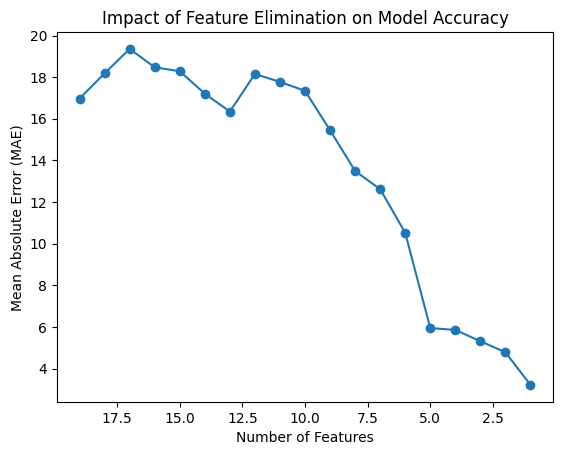

In [5]:

plt.plot(num_features_list, mae_list, marker='o')
plt.title('Impact of Feature Elimination on Model Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Mean Absolute Error (MAE)')
plt.gca().invert_xaxis()
plt.show()